In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext nb_black
import tensorflow as tf


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [14]:
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")
timeseries = pd.read_csv("../data/processed/timeseries_15_rows_per_county.csv")

<IPython.core.display.Javascript object>

## Understand the data
Timeseries is our train dataset but for each cfip we have taken microdensity instances 1-23 and used 24 as target, 2-24, 25 target and so on

In [15]:
print(f"timeseries shape: {timeseries.shape}")
timeseries.head(20)

timeseries shape: (47025, 29)


,cfips,POPESTIMATE2021,active,target,target_date,0,1,2,3,4,...,14,15,16,17,18,19,20,21,22,23
0,1001,59095,1249,3.219917,2021-08-01,3.007682,2.884870,3.055843,2.993233,2.993233,...,3.193804,3.038416,3.002558,2.947244,3.106106,3.144043,3.224659,3.227030,3.222288,3.210433
1,1001,59095,1249,3.186722,2021-09-01,2.884870,3.055843,2.993233,2.993233,2.969090,...,3.038416,3.002558,2.947244,3.106106,3.144043,3.224659,3.227030,3.222288,3.210433,3.219917
2,1001,59095,1249,3.203320,2021-10-01,3.055843,2.993233,2.993233,2.969090,2.909326,...,3.002558,2.947244,3.106106,3.144043,3.224659,3.227030,3.222288,3.210433,3.219917,3.186722
3,1001,59095,1249,3.200948,2021-11-01,2.993233,2.993233,2.969090,2.909326,2.933231,...,2.947244,3.106106,3.144043,3.224659,3.227030,3.222288,3.210433,3.219917,3.186722,3.203320
4,1001,59095,1249,3.286307,2021-12-01,2.993233,2.969090,2.909326,2.933231,3.000167,...,3.106106,3.144043,3.224659,3.227030,3.222288,3.210433,3.219917,3.186722,3.203320,3.200948
5,1001,59095,1249,3.296781,2022-01-01,2.969090,2.909326,2.933231,3.000167,3.004948,...,3.144043,3.224659,3.227030,3.222288,3.210433,3.219917,3.186722,3.203320,3.200948,3.286307
6,1001,59095,1249,3.334431,2022-02-01,2.909326,2.933231,3.000167,3.004948,3.019292,...,3.224659,3.227030,3.222288,3.210433,3.219917,3.186722,3.203320,3.200948,3.286307,3.296781
7,1001,59095,1249,3.336785,2022-03-01,2.933231,3.000167,3.004948,3.019292,3.083837,...,3.227030,3.222288,3.210433,3.219917,3.186722,3.203320,3.200948,3.286307,3.296781,3.334431
8,1001,59095,1249,3.372082,2022-04-01,3.000167,3.004948,3.019292,3.083837,3.174679,...,3.222288,3.210433,3.219917,3.186722,3.203320,3.200948,3.286307,3.296781,3.334431,3.336785
9,1001,59095,1249,3.313253,2022-05-01,3.004948,3.019292,3.083837,3.174679,3.205756,...,3.210433,3.219917,3.186722,3.203320,3.200948,3.286307,3.296781,3.334431,3.336785,3.372082


<IPython.core.display.Javascript object>

In [16]:
import tensorflow as tf

<IPython.core.display.Javascript object>

## Deep Learning

In [17]:
def build_model():

    inp = tf.keras.Input(shape=(24, 1))

    x = tf.keras.layers.GRU(units=128, return_sequences=False)(inp)
    x = tf.keras.layers.Dense(1, activation="linear")(x)
    model = tf.keras.Model(inputs=inp, outputs=x)

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    loss = tf.keras.losses.MeanSquaredError()
    model.compile(loss=loss, optimizer=opt)

    return model

<IPython.core.display.Javascript object>

In [18]:
model = build_model()

<IPython.core.display.Javascript object>

In [19]:
# find the 50% percentile based on POPESTIMATE2021
subset_df = timeseries[timeseries["POPESTIMATE2021"] > timeseries["POPESTIMATE2021"].quantile(0.5)]
X_subset = subset_df.drop(
    ["target", "target_date", "cfips", "POPESTIMATE2021", "active"], axis=1
)
y_subset = subset_df["target"]

<IPython.core.display.Javascript object>

In [20]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices("GPU")))
# train with gpu
result = None
with tf.device("/GPU:0"):
    result = model.fit(X_subset, y_subset, epochs=25)

Num GPUs Available:  0
Epoch 1/25
735/735 [==============================] - 7s 7ms/step - loss: 22.9830
Epoch 2/25
735/735 [==============================] - 5s 7ms/step - loss: 16.1930
Epoch 3/25
735/735 [==============================] - 5s 7ms/step - loss: 12.9553
Epoch 4/25
735/735 [==============================] - 5s 7ms/step - loss: 10.6477
Epoch 5/25
735/735 [==============================] - 5s 7ms/step - loss: 8.7978
Epoch 6/25
735/735 [==============================] - 5s 7ms/step - loss: 7.3837
Epoch 7/25
735/735 [==============================] - 5s 7ms/step - loss: 6.3240
Epoch 8/25
735/735 [==============================] - 5s 7ms/step - loss: 5.6693
Epoch 9/25
735/735 [==============================] - 5s 7ms/step - loss: 5.0329
Epoch 10/25
735/735 [==============================] - 5s 7ms/step - loss: 4.6600
Epoch 11/25
735/735 [==============================] - 5s 7ms/step - loss: 4.2257
Epoch 12/25
735/735 [==============================] - 5s 7ms/step - loss: 4.139

<IPython.core.display.Javascript object>

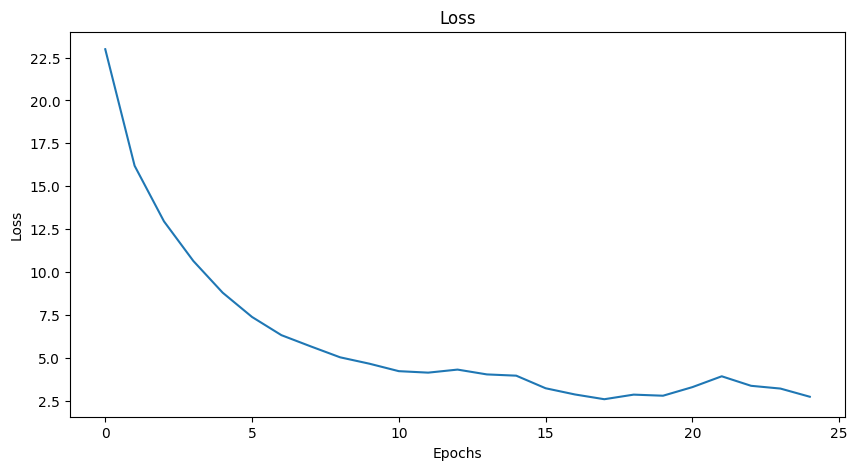

<IPython.core.display.Javascript object>

In [21]:
# plot the loss
fig = plt.figure(figsize=(10, 5))
plt.plot(result.history["loss"])
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()